In [629]:
#dataset import
import numpy as np
import pandas as pd
dataset = pd.read_csv("dataset.csv")
dataset.head(10) #check dataset

,drop_orientation,landing_orientation,landing_distance
0,0,1,24
1,1,1,43
2,2,0,30
3,0,1,10
4,1,0,32
5,2,0,41
6,0,1,20
7,1,0,16
8,2,1,41
9,0,1,17


In [630]:
#changing pandas dataframe to numpy arrays
input_np_arr = dataset.iloc[:,:1].values #drop orientation data
output1_np_arr = dataset.iloc[:,1:2].values #landing orientation data
output2_np_arr = dataset.iloc[:,2:3].values #landing distance data

In [631]:
#normalizing the input(drop_orientation) and output data(landing_distance)
from sklearn.preprocessing import StandardScaler
input_scaler = StandardScaler().fit(input_np_arr)
input_np_arr_norm = input_scaler.transform(input_np_arr)
output2_scaler = StandardScaler().fit(output2_np_arr)
output2_np_arr_norm = output2_scaler.transform(output2_np_arr)

#encoding the output data(landing_orientation)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
output1_encoded_arr = ohe.fit_transform(output1_np_arr).toarray()

In [632]:
#quick lookup to the np array shapes
print(input_np_arr_norm[0:4,:])
print(output2_np_arr_norm[0:4,:])
print(output1_encoded_arr[0:4,:])

[[-1.22474487]
 [ 0.        ]
 [ 1.22474487]
 [-1.22474487]]
[[-0.43744854]
 [ 1.07104839]
 [ 0.03891891]
 [-1.54897259]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [633]:
#getting two output data together:  encoded landing orientation and normalized landing distance
output_arr_prep = np.column_stack((output1_encoded_arr,output2_np_arr_norm))

In [634]:
#dividing the dataset into train and test subsets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_np_arr_norm, output_arr_prep,test_size = 0.1)

In [635]:
#quick lookup to train dataset output shape
print(y_train[0:4,:])

[[ 1.          0.         -0.83442142]
 [ 0.          1.         -0.35805397]
 [ 1.          0.          0.67407551]
 [ 0.          1.         -0.04047567]]


In [636]:
#keras dependencies
import keras
from keras.models import Model
from keras.layers import Dense
from keras.layers import Input
from keras import Model

#implementing neural network

input_shape = Input(shape=(1), name='input')
first_layer = Dense(3, input_dim = 1,activation="relu")(input_shape)
second_layer = Dense(6, activation="relu")(first_layer)
third_layer = Dense(3, input_dim = 1,activation="relu")(second_layer)
output_layer_1 = Dense(2, activation="softmax", name="land_orient")(third_layer)
output_layer_2 = Dense(1, name = "land_dist")(third_layer)

model = Model(inputs = input_shape, outputs = [output_layer_1,output_layer_2])

In [637]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [638]:
history = model.fit(x_train, (y_train[:, 0:2],y_train[:, 2:3]), validation_data = (x_test,(y_test[:, 0:2],y_test[:, 2:3])), epochs=100, batch_size=64)

Epoch 1/100
2/2 [==============================] - 2s 347ms/step - loss: 1.2295 - land_orient_loss: 0.6934 - land_dist_loss: 0.5361 - land_orient_accuracy: 0.5495 - land_dist_accuracy: 0.0000e+00 - val_loss: 1.1767 - val_land_orient_loss: 0.6933 - val_land_dist_loss: 0.4834 - val_land_orient_accuracy: 0.6364 - val_land_dist_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 55ms/step - loss: 1.2073 - land_orient_loss: 0.6932 - land_dist_loss: 0.5141 - land_orient_accuracy: 0.5495 - land_dist_accuracy: 0.0000e+00 - val_loss: 1.1883 - val_land_orient_loss: 0.6934 - val_land_dist_loss: 0.4949 - val_land_orient_accuracy: 0.6364 - val_land_dist_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 1.1867 - land_orient_loss: 0.6931 - land_dist_loss: 0.4936 - land_orient_accuracy: 0.6154 - land_dist_accuracy: 0.0000e+00 - val_loss: 1.2006 - val_land_orient_loss: 0.6934 - val_land_dist_loss: 0.5072 - val_land_orient_accuracy: 0.636

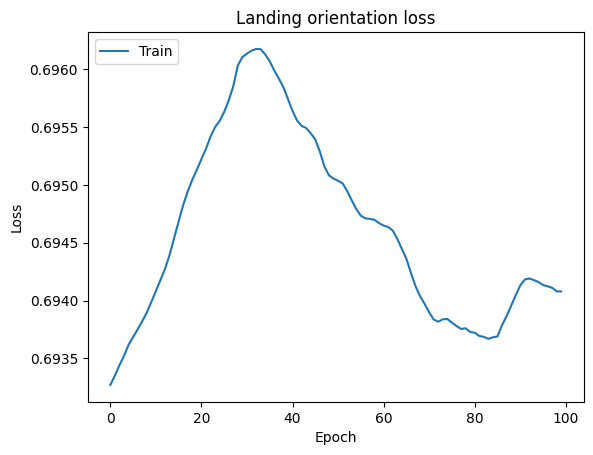

In [639]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_land_orient_loss'])
plt.title('Landing orientation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

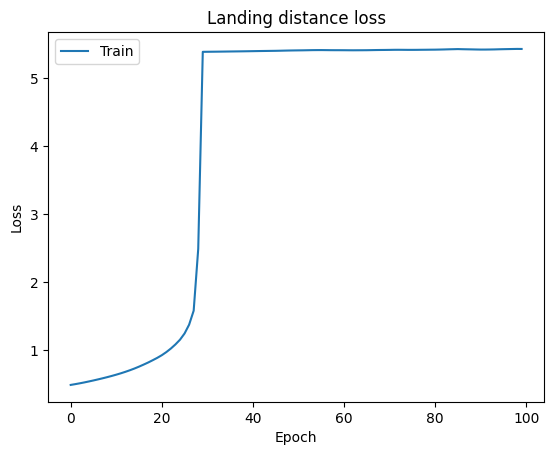

In [640]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_land_dist_loss'])
plt.title('Landing distance loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [641]:
input_orientation = 0
pred = model.predict(input_scaler.transform(np.array([input_orientation]).reshape(1,-1)))

predicted_orientation = np.argmax(pred[0])
prediction_accuracy = pred[0][0][np.argmax(pred[0])]
predicted_distance = output2_scaler.inverse_transform(pred[1])
print("Input: {}".format(input_orientation))
print("Orientation: {}, Accuracy: {}".format(predicted_orientation,prediction_accuracy))
print("Distance: {}".format(predicted_distance[0][0]))

input_orientation = 1
pred = model.predict(input_scaler.transform(np.array([input_orientation]).reshape(1,-1)))

predicted_orientation = np.argmax(pred[0])
prediction_accuracy = pred[0][0][np.argmax(pred[0])]
predicted_distance = output2_scaler.inverse_transform(pred[1])
print("Input: {}".format(input_orientation))
print("Orientation: {}, Accuracy: {}".format(predicted_orientation,prediction_accuracy))
print("Distance: {}".format(predicted_distance[0][0]))

input_orientation = 2
pred = model.predict(input_scaler.transform(np.array([input_orientation]).reshape(1,-1)))

predicted_orientation = np.argmax(pred[0])
prediction_accuracy = pred[0][0][np.argmax(pred[0])]
predicted_distance = output2_scaler.inverse_transform(pred[1])
print("Input: {}".format(input_orientation))
print("Orientation: {}, Accuracy: {}".format(predicted_orientation,prediction_accuracy))
print("Distance: {}".format(predicted_distance[0][0]))

1/1 [==============================] - 0s 83ms/step
Input: 0
Orientation: 1, Accuracy: 0.5022876858711243
Distance: 29.12772560119629
1/1 [==============================] - 0s 23ms/step
Input: 1
Orientation: 0, Accuracy: 0.5098918676376343
Distance: 28.645923614501953
1/1 [==============================] - 0s 26ms/step
Input: 2
Orientation: 1, Accuracy: 0.5187157392501831
Distance: 29.777868270874023
